In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Typings
from numpy import ndarray
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import History
from sklearn.preprocessing import StandardScaler



In [2]:

dataset_path: str = "../../data/assignment2/HeartDiseaseDataset_small.csv"

df = pd.read_csv(dataset_path)

X: ndarray = df.drop("HeartDisease", axis=1).to_numpy()
Y: ndarray = df["HeartDisease"].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Train: 60%, Test: 20%, Validation: 20%

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


print("Input Shape: ", X_train.shape)
print("Output Shape: ", Y_train.shape)

input_shape = X_train.shape[1]

Input Shape:  (550, 6)
Output Shape:  (550,)


In [3]:
mlp_model = Sequential([
    Input(shape=(input_shape,)),
    Dense(64, activation='leaky_relu'),
    Dense(32, activation='leaky_relu'),
    Dense(1, activation='sigmoid')
])

optimizer: Adam = Adam(learning_rate=0.0019)

early_stop: EarlyStopping  = EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta= 0.0001,
    restore_best_weights=True
)


mlp_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [4]:
history_mlp = mlp_model.fit(X_train, Y_train,
                        validation_data=(X_val, Y_val),
                        epochs=38,
                        batch_size=32,
                        #callbacks=[early_stop]
                            )

Epoch 1/38


18/18 [==============================] - 2s 18ms/step - loss: 0.6000 - accuracy: 0.7055 - val_loss: 0.5040 - val_accuracy: 0.7554
Epoch 2/38
18/18 [==============================] - 0s 5ms/step - loss: 0.4962 - accuracy: 0.7509 - val_loss: 0.4805 - val_accuracy: 0.7826
Epoch 3/38
18/18 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7691 - val_loss: 0.4790 - val_accuracy: 0.7554
Epoch 4/38
18/18 [==============================] - 0s 6ms/step - loss: 0.4744 - accuracy: 0.7873 - val_loss: 0.4968 - val_accuracy: 0.7772
Epoch 5/38
18/18 [==============================] - 0s 5ms/step - loss: 0.4704 - accuracy: 0.7836 - val_loss: 0.4845 - val_accuracy: 0.7609
Epoch 6/38
18/18 [==============================] - 0s 5ms/step - loss: 0.4622 - accuracy: 0.7927 - val_loss: 0.4845 - val_accuracy: 0.7500
Epoch 7/38
18/18 [==============================] - 0s 5ms/step - loss: 0.4603 - accuracy: 0.7945 - val_loss: 0.4811 - val_accuracy: 0.7717
Epoch 8/38
18/18 

6/6 [==============================] - 0s 3ms/step


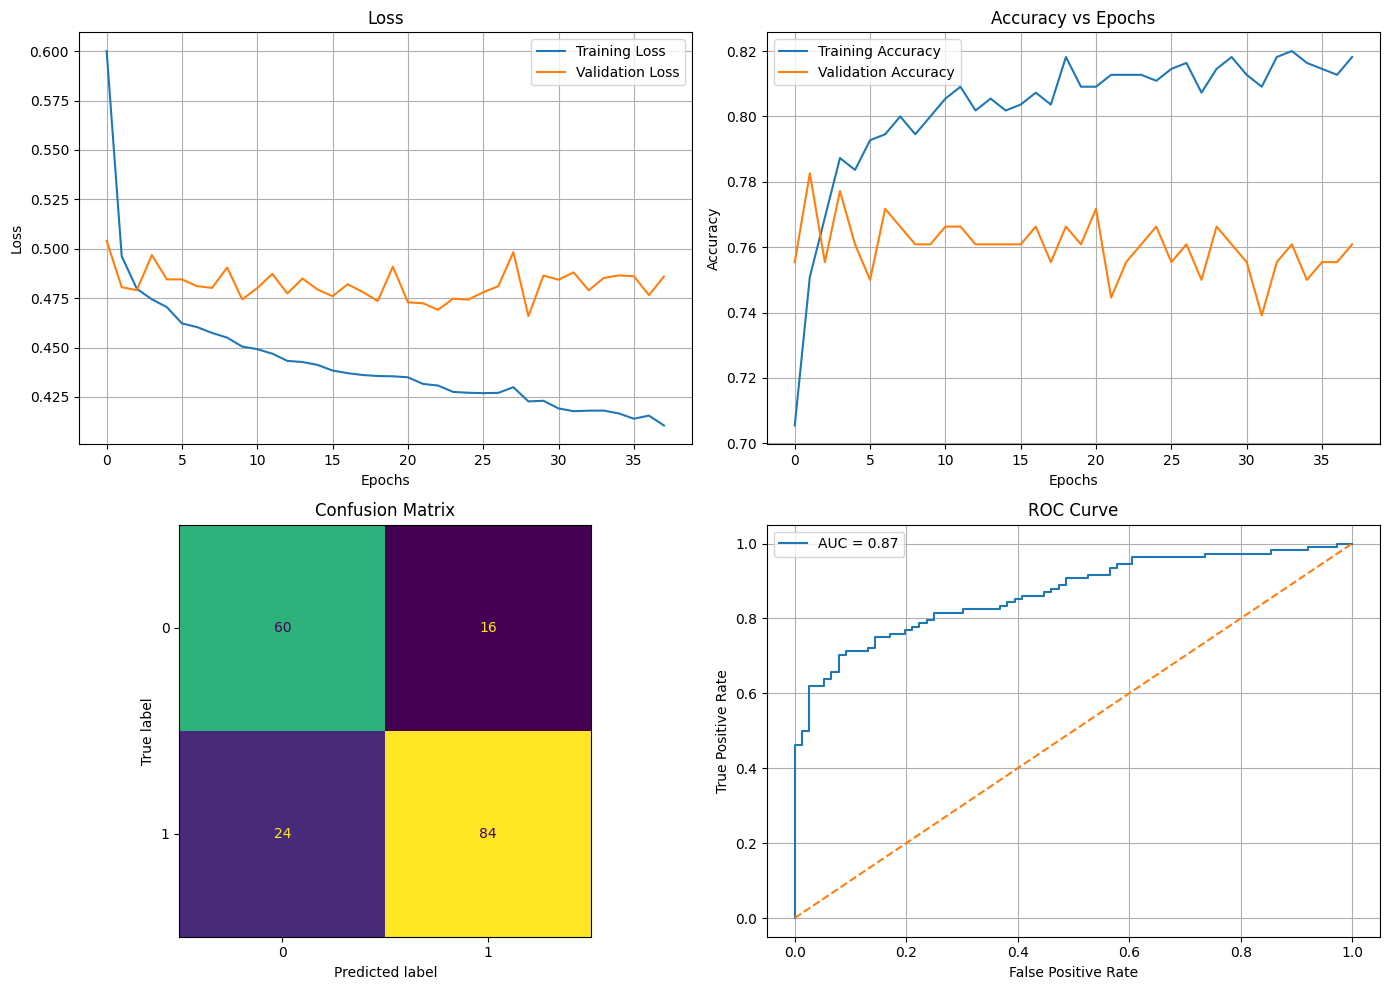

In [5]:
Y_pred_prob = mlp_model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(Y_test, Y_pred)

fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(history_mlp.history['loss'], label='Training Loss')
axs[0, 0].plot(history_mlp.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(history_mlp.history['accuracy'], label='Training Accuracy')
axs[0, 1].plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_title('Accuracy vs Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[1, 0], colorbar=False)
axs[1, 0].set_title("Confusion Matrix")

axs[1, 1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axs[1, 1].plot([0, 1], [0, 1], linestyle='--')
axs[1, 1].set_title('ROC Curve')
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [6]:
from logistic_model import history

acc_log = history.history['accuracy']
val_acc_log = history.history['val_accuracy']
loss_log = history.history['loss']
val_loss_log = history.history['val_loss']

acc_mlp = history_mlp.history['accuracy']
val_acc_mlp = history_mlp.history['val_accuracy']
loss_mlp = history_mlp.history['loss']
val_loss_mlp = history_mlp.history['val_loss']

epochs_log = range(1, len(acc_log) + 1)
epochs_mlp = range(1, len(acc_mlp) + 1)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(epochs_log, acc_log, label='Logistic Regression Train Accuracy', color='green')
axs[0].plot(epochs_log, val_acc_log, label='Logistic Regression Validation Accuracy', color='blue', linestyle='--')
axs[0].plot(epochs_mlp, acc_mlp, label='MLP Classifier Train Accuracy', color='red')
axs[0].plot(epochs_mlp, val_acc_mlp, label='MLP Classifier Validation Accuracy', color='orange', linestyle='--')
axs[0].set_title('Accuracy Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(epochs_log, loss_log, label='Logistic Regression Train Loss', color='green')
axs[1].plot(epochs_log, val_loss_log, label='Logistic Regression Validation Loss', color='blue', linestyle='--')
axs[1].plot(epochs_mlp, loss_mlp, label='MLP Classifier Train Loss', color='red')
axs[1].plot(epochs_mlp, val_loss_mlp, label='MLP Classifier Validation Loss', color='orange', linestyle='--')
axs[1].set_title('Loss Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'logistic_model'